# Big Mart Sales Prediction
The data scientists at BigMart have
collected 2013 sales data for 1559 products
across 10 stores in different cities. Also,
certain attributes of each product and store
have been defined. The aim is to build a
predictive model and find out the sales of
each product at a particular store.


Using this model, BigMart will try to
understand the properties of products and
stores which play a key role in increasing
sales

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Check file 
import os 
path_Data = '//content//gdrive//MyDrive//BigMartSales Prediction//'
checkPath = os.path.isdir(path_Data)
checkFileTrain = os.path.isfile(path_Data + "Train.csv")
checkFileTest = os.path.isfile(path_Data + "Test.csv")
print(checkFileTrain,checkFileTest,path_Data)

True True //content//gdrive//MyDrive//BigMartSales Prediction//


In [ ]:
#Read data
import pandas as pd
train = pd.read_csv(path_Data + "Train.csv")
test = pd.read_csv(path_Data + "Test.csv")

#Check shape of data
print(train.shape,test.shape)
print(train.index)
print(train.columns) 


(8523, 12) (5681, 11)
RangeIndex(start=0, stop=8523, step=1)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


**np.unique()** method: we can get the unique values from an array given as parameter in np.unique() method.

In [ ]:
import numpy as np

display(train.head(5))
print(np.unique(train["Item_Fat_Content"]))
print(np.unique(train["Item_Type"]))
print(np.unique(train["Outlet_Location_Type"]))
print(np.unique(train["Outlet_Type"]))
print(train['Outlet_Size'].unique())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


['LF' 'Low Fat' 'Regular' 'low fat' 'reg']
['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']
['Tier 1' 'Tier 2' 'Tier 3']
['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']
['Medium' nan 'High' 'Small']


In [ ]:
# Count the same element in column Item_Fat_Content (train is series)
s = train['Item_Fat_Content'].value_counts()
# Like creating a excel (Visualization)
StatsDF = pd.DataFrame({'Item_Fat_Content':s.index, 'Frequency':s.values})
display(StatsDF)

,Item_Fat_Content,Frequency
0,Low Fat,5089
1,Regular,2889
2,LF,316
3,reg,117
4,low fat,112


In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#Learn describe
train.describe(include = np.object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [ ]:
train.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]>

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


My data has null...

Null will affect to my prediction so we need to fix it.

In [ ]:
# Count the null
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Depending on the purpose of project, we will have a lot of ways to fill null value. 

In this project, we can use mean, mode or median to fill but in other projects related to banking,... we can not do it.

In [ ]:
#Filling null values with mean/mode/median
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode().iloc[0])
test.Item_Weight = test.Item_Weight.fillna(test.Item_Weight.mean())
test.Outlet_Size = test.Outlet_Size.fillna(test.Outlet_Size.mode().iloc[0])

In [ ]:
# Check 1 more to be sure there is no null
print(train.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
print(test.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [ ]:
# Count elements of each kind in column Item_Fat_Content
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [ ]:
#decornate
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('low fat','Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('LF','Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('reg','Regular')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('low fat','Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('LF','Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.str.replace('reg','Regular')

<function matplotlib.pyplot.show>

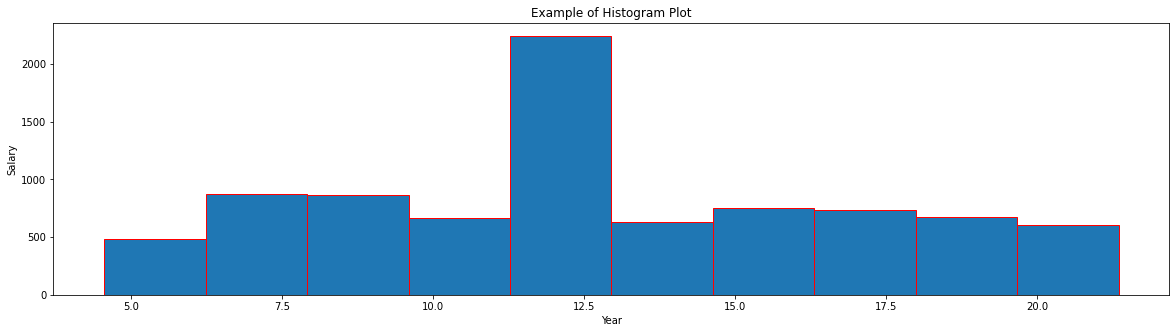

In [ ]:
import matplotlib.pyplot as plt
#Plot the distribution of numpy data
train.Item_Weight.plot(kind='hist', edgecolor='red', figsize=(20,5))

#Add axis labels
plt.xlabel("Year")
plt.ylabel("Salary")
plt.title("Example of Histogram Plot")
plt.show

**Seaborn** distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations. We use seaborn in combination with matplotlib, the Python plotting module.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


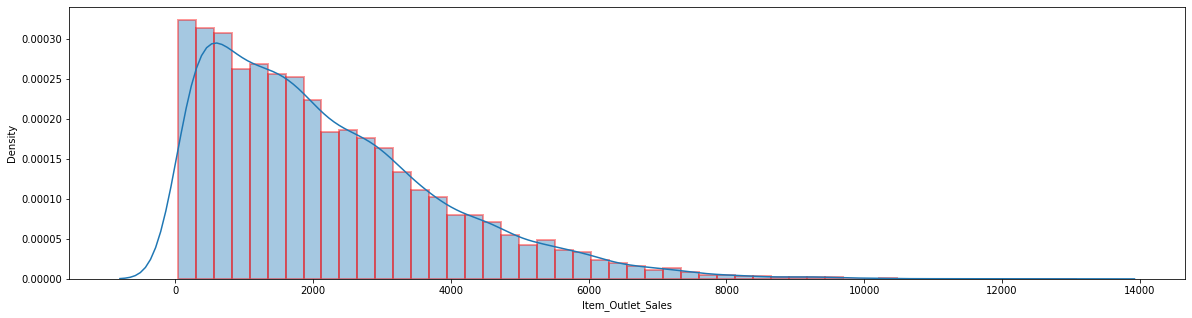

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
#Learn more
sns.distplot(train["Item_Outlet_Sales"], hist_kws=dict(edgecolor="red",linewidth=2))


***From this graph, we can see the prices of the products (under 10000 and highest density lies between 0-2000) and the customer segments the company wants to target, after that we will have some marketing and sale strategies to be suitable***

**seaborn.countplot**: Show the counts of observations in each categorical bin using bars.

Eye-catching ...

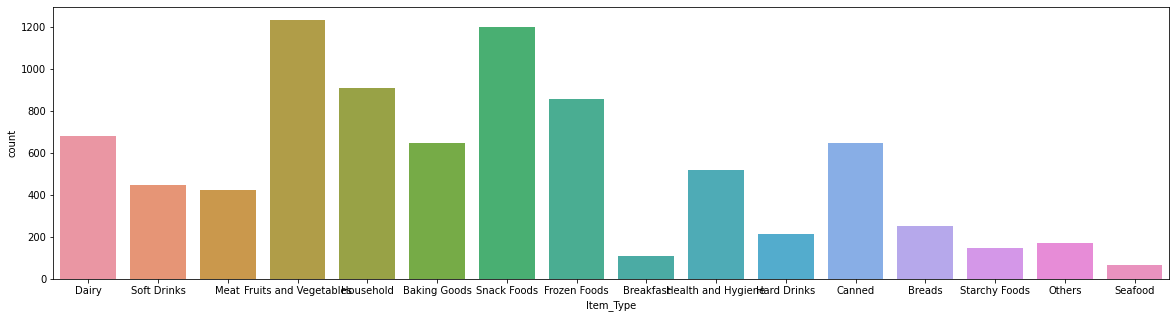

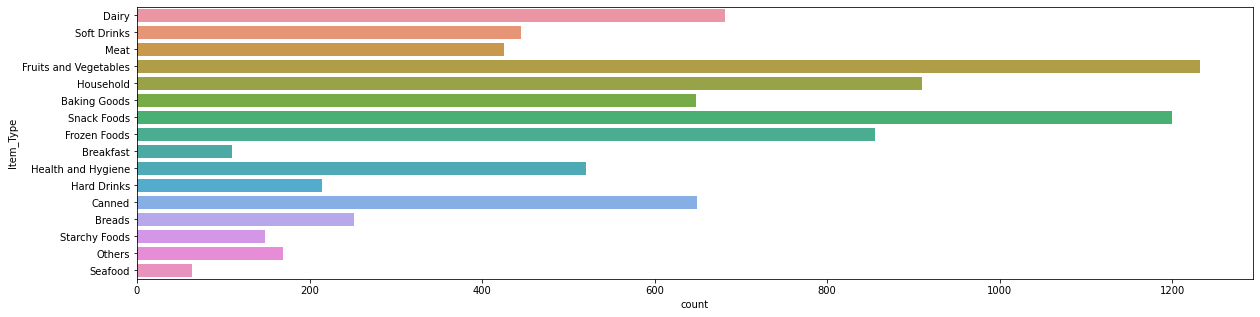

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.countplot(x='Item_Type',data=train)

plt.figure(figsize=(20,5))
sns.countplot(y="Item_Type",data=train)

**Analysis**


From this information, we will know the level of consumption of products, for example,there are a lagre number of customers like eating meat, snack foods and just a little bit of them like having breakfast and seafood so we can invest in creating more dishes from meat and more kind of snacks to have more choice for customers.

Moreover, we need to find the reason why they do not like seafood and breakfast, If reason is its taste is not good, we need to improve it. Or your their lifestyle and habits they do not use this kind of food, we should wonder to invest to it

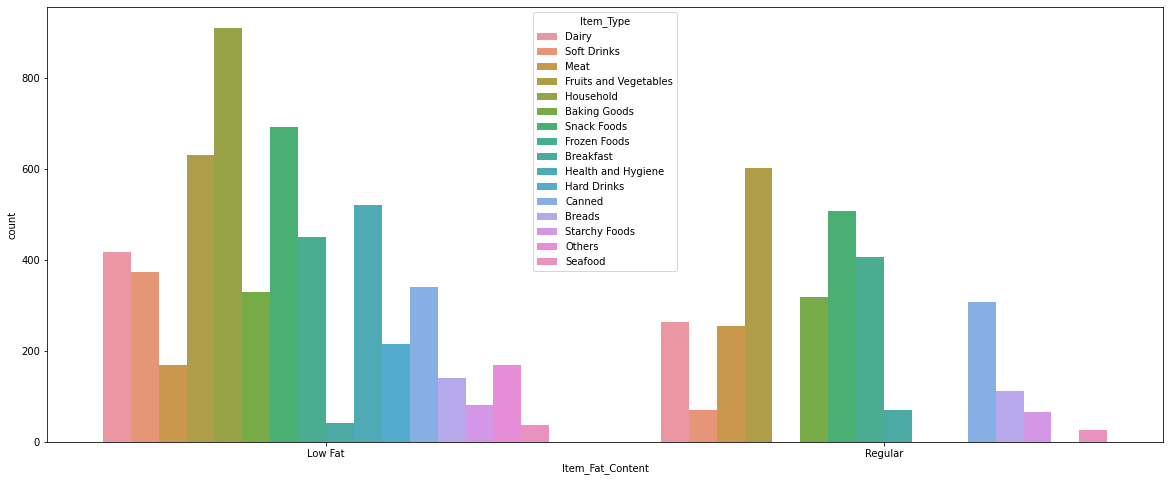

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,8))
sns.countplot(x='Item_Fat_Content',hue="Item_Type",data=train)

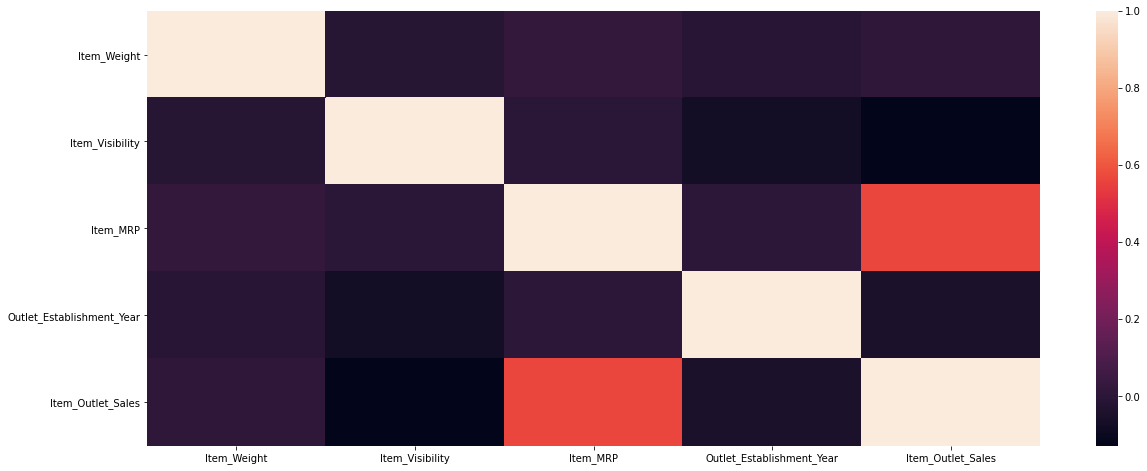

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(train.corr(),)

**Analysis**

From this information, we can see the correlation between factors affecting the customers's decisions thence we can change business tactics accordingly

In [ ]:
x_train = train[['Item_Weight','Item_Visibility','Item_MRP']]
x_test = test[["Item_Weight",'Item_Visibility','Item_MRP']]
y_train=train['Item_Outlet_Sales']

In [ ]:
x_train

,Item_Weight,Item_Visibility,Item_MRP
0,9.300,0.016047,249.8092
1,5.920,0.019278,48.2692
2,17.500,0.016760,141.6180
3,19.200,0.000000,182.0950
4,8.930,0.000000,53.8614
...,...,...,...
8518,6.865,0.056783,214.5218
8519,8.380,0.046982,108.1570
8520,10.600,0.035186,85.1224
8521,7.210,0.145221,103.1332


In [ ]:
np.isfinite(y_train.any()) #and gets True

True

In [ ]:
np.isnan(x_train.any()) #and gets False


Item_Weight        False
Item_Visibility    False
Item_MRP           False
dtype: bool

In [ ]:
y_train

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

**K-Nearest Neighbor** (KNN) algorithm is a distance based supervised learning algorithm that is used for solving classification problems. In this, we will be looking at the classes of the k nearest neighbors to a new point and assign it the class to which the majority of k neighbours belong too.

 

To identify the nearest neighbors we use various techniques of measuring distance, the most common of them being the  ‘Euclidean Distance’.

- n_neighbors: Number of neighbors to use by default for kneighbors queries

Fitting your model to (i.e. using the .fit() method on) the training data is essentially the training part of the modeling process. It finds the coefficients for the equation specified via the algorithm being used (take for example umutto's linear regression example, above).

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
#For machine learn
neigh=KNeighborsRegressor(n_neighbors=10)
neigh.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

Fitting is equal to training. Then, after it is trained, the model can be used to make predictions, usually with a .predict() method call.

In [ ]:
y_pred = neigh.predict(x_train)
PredictDF = train.copy()
PredictDF["Item_Outlet_Sales_Predict"]=y_pred

This is the result  ^^

In [ ]:
display(PredictDF.head(20))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_Predict
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,4311.32132
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,839.50722
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1906.38514
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2609.33678
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,887.37824
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,663.73602
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,868.93558
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,1623.28698
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,1762.97182
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,2603.14484
